In [1]:
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import signal
import math
import cv2
from scipy.linalg import hadamard    
import pandas as pd

In [2]:
# FOR 1-D Identity
scene = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/scene_1d.csv', delimiter=',')
bs = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/black_subtract_1d.csv', delimiter=',')
masks_1d_id = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/mask_1d_59.csv', delimiter=',')

In [3]:
bs = bs.reshape(1024,1280,16)
scene = scene.reshape(1024,1280,16)
y = scene - bs
y.shape

(1024, 1280, 16)

In [4]:
# row in scence image, 500 - 545,
# column in scene image, 269 - 1021, 47 for each pattern
A_1d_id = np.identity(16)
Y_1d_id = np.zeros([16,1])
#black_init = np.copy(init[500:545,269:1021])
#X = np.zeros([16,1]) 
#j = 0
for i in range(16):
    Y_1d_id[i,0] = np.sum(y[500:545,269:1021,i])
    #X[i,0] = np.sum(black_init[:,j:j+47])
    #j += 47
    

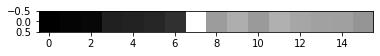

In [5]:
plt.imshow(np.transpose(Y_1d_id), cmap='gray')

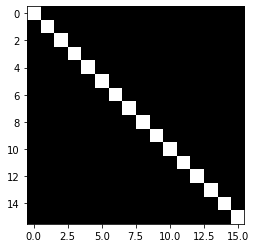

In [6]:
plt.imshow(A_1d_id, cmap='gray')

In [7]:
ab = np.linalg.pinv(A_1d_id, rcond=1e-1)
xhat = np.matmul(ab,Y_1d_id)

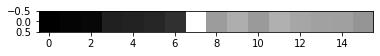

In [8]:
plt.imshow(np.transpose(xhat), cmap='gray')

In [9]:
masks_1d_rand = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/mask_1drand_59.csv', delimiter=',')

In [10]:
# FOR 1-D Random
scene_1d_rand = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/scene_1drand_59.csv', delimiter=',')
b_1d_rand = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/black_subtract_1drand_59.csv', delimiter=',')
masks_1d_rand = np.loadtxt('C:/Users/kambl/Johns Hopkins/Siya Zhang - Lab data/FinalProj/mask_1drand_59.csv', delimiter=',')

In [11]:
masks_1d_rand = masks_1d_rand.reshape(16,16,16)
A_1d_rand = np.zeros([16,16])
for i in range(16):
    A_1d_rand[i,:] = masks_1d_rand[8,:,i]

In [12]:
b_1d_rand = b_1d_rand.reshape(1024,1280,16)
scene_1d_rand = scene_1d_rand.reshape(1024,1280,16)
y_1d_rand = scene_1d_rand - b_1d_rand
y_1d_rand.shape

(1024, 1280, 16)

In [13]:
# row in scence image, 478 - 522,
# column in scene image, 263 - 1015, 47 for each pattern
A = masks_1d_rand.reshape(16,16,16)
Y_1d_rand = np.zeros([16,1])

for i in range(16):
    Y_1d_rand[i,0] = np.sum(y_1d_rand[478:522,263:1015,i])

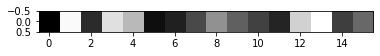

In [14]:
plt.imshow(np.transpose(Y_1d_rand), cmap='gray')

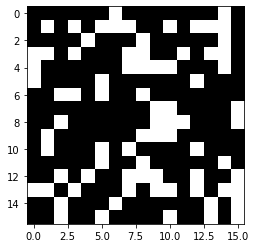

In [15]:
plt.imshow(A_1d_rand, cmap='gray')

In [16]:
ab = np.linalg.pinv(A_1d_rand, rcond=1e-1)
xhat = np.matmul(ab,Y_1d_rand)

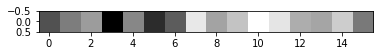

In [17]:
plt.imshow(np.transpose(xhat), cmap='gray')

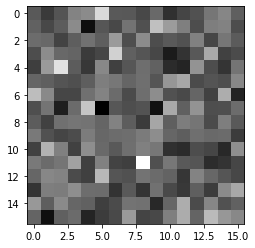

In [18]:
plt.imshow(ab, cmap='gray')

In [19]:
# np.savetxt('Y_1d_id.csv',Y_1d_id,delimiter=',')
# np.savetxt('A_1d_id.csv',A_1d_id,delimiter=',')
# np.savetxt('Y_1d_rand.csv',Y_1d_rand,delimiter=',')
# np.savetxt('A_1d_rand.csv',A_1d_rand,delimiter=',')